In [1]:
import pandas as pd

tts_res = pd.read_csv('./results-against-tts.csv',
                      delim_whitespace=True,
                      names=["wav_path", "score", "rank"])
tts_res

,wav_path,score,rank
0,D:/Xiaoying/paper/icassp2023/wavs/430-20190409...,0.600000,2
1,D:/Xiaoying/paper/icassp2023/wavs/430-20190316...,0.933333,3
2,D:/Xiaoying/paper/icassp2023/wavs/430-20191219...,0.733333,3
3,D:/Xiaoying/paper/icassp2023/wavs/430-20190726...,0.666667,2
4,D:/Xiaoying/paper/icassp2023/wavs/430-20190319...,0.800000,3
...,...,...,...
1381,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,0.238656,1
1382,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,0.561804,2
1383,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,0.292536,1
1384,D:/Xiaoying/paper/icassp2023/wavs/459-20191108...,0.764706,3


In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix


def get_report(i):
    test_df=pd.read_csv(f'../../test/coarse_grain_set/coarse_grain_testset_{i}.csv')
    y_true = []
    y_pred = []
    for index, row in test_df.iterrows():
        wavid=row['wavid']
        label=row['label']
        target_df = tts_res[tts_res['wav_path'].str.contains(wavid)]
        pred_val = target_df['rank'].values[0]
        if pred_val not in [1,2,3]:
            print(wavid)
        if pred_val == 3 and label == 1:
            print(i, wavid)
        y_pred.append(pred_val-1)
        y_true.append(label-1)
    # res = classification_report(y_true,
    #                             y_pred,
    #                             labels=[0, 1, 2],
    #                             output_dict=True)
    # return (res)
    return [i + 1 for i in y_true], [i + 1 for i in y_pred]


In [4]:
import numpy as np

report_res = []
for i in range(0, 5):
    path = f'../overall_evaluation/res/coarse_grain_testset_{i}.csv'
    res_df = pd.read_csv(path)
    labels, preds = get_report(i)
    if (np.array(labels) == np.array(res_df['label'].values.tolist())).all():
        print(True)
    else:
        print(False)
    res_df.insert(res_df.shape[1], "Against-TTS", preds)
    res_df.to_csv(path, index=False)

True
True
True
True
True


In [2]:
# 混淆矩阵

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# classes = ['A','B','C','D','E']
# confusion_matrix = np.array([(9,1,3,4,0),(2,13,1,3,4),(1,4,10,0,13),(3,1,1,17,0),(0,0,0,1,14)],dtype=np.float64)

def show_confusion_max(y_true, y_pred):
    # 标签
    classes = ['poor', 'fair', ' great']
    # 标签的个数
    classNamber = 3

    # 在标签中的矩阵
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    # print(confusion_matrix)

    plt.imshow(cm, interpolation='nearest',
            cmap=plt.cm.Oranges)  #按照像素显示出矩阵
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    #iters = [[i,j] for i in range(len(classes)) for j in range((classes))]
    #ij配对，遍历矩阵迭代器
    iters = np.reshape([[[i, j] for j in range(classNamber)]
                        for i in range(classNamber)], (cm.size, 2))
    for i, j in iters:
        plt.text(j, i, format(cm[i, j]), va='center',
                ha='center')  #显示对应的数字

    plt.ylabel('True Label')
    plt.xlabel('Predicted  Label')
    plt.tight_layout()
    plt.show()


1 428-20191020_fd60180f9d3744cda5c9b9c73b274183
1 430-20190203_2195f16db65c43b5aee65b3ba9859953
2 459-20191028_57213c6d3b934bfda0b2a6d65def71ab
coarse grained: against tts


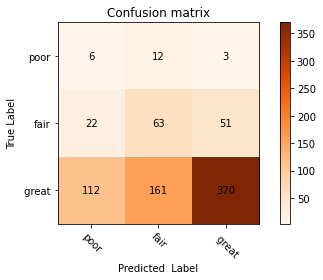

In [29]:
y_true = []
y_pred = []
for i in range(0,5):
    t, p=get_report(i)
    y_true.extend(t)
    y_pred.extend(p)

print("coarse grained: against tts")
show_confusion_max(y_true, y_pred)

#Break-BERT: coarse grained


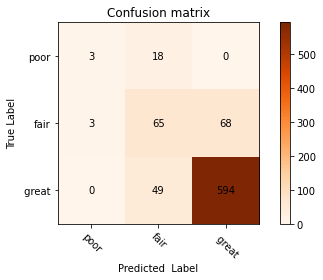

In [5]:
y_true = []
y_pred = []
for i in range(0, 5):
    res_df=pd.read_csv(f'../overall_evaluation/res/coarse_grain_testset_{i}.csv')
    t = res_df["label"].values.tolist()
    p = res_df["#Break-BERT"].values.tolist()
    y_true.extend(t)
    y_pred.extend(p)

print("#Break-BERT: coarse grained")
show_confusion_max(y_true, y_pred)

Against-TTS fine-grained


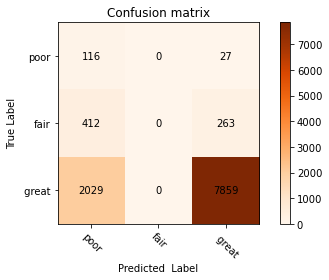

In [19]:
y_true = []
y_pred = []
for i in range(0, 5):
    res_df = pd.read_csv(
        f'../fine-grained_evaluation/res/fine_grain_testset_{i}.csv')
    t = sum([eval(i)[1::2] for i in res_df["label"].values.tolist()], [])
    p = sum([eval(i) for i in res_df["Against-TTS"].values.tolist()],[])
    y_true.extend(t)
    y_pred.extend(p)
print("Against-TTS fine-grained")
show_confusion_max(y_true, y_pred)

#Break-BERT fine-grained


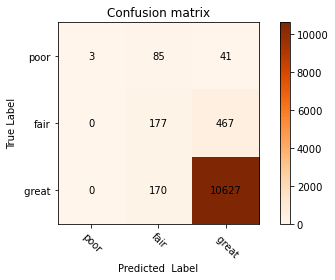

In [5]:
y_true = []
y_pred = []
for i in range(0, 5):
    res_df = pd.read_csv(
        f'../fine-grained_evaluation/res/fine_grain_testset_{i}.csv')
    t = sum([eval(i)[1::2] for i in res_df["label"].values.tolist()], [])
    p = sum([eval(i) for i in res_df["#Break-BERT"].values.tolist()],[])
    y_true.extend(t)
    y_pred.extend(p)
print("#Break-BERT fine-grained")
show_confusion_max(y_true, y_pred)

#BERT


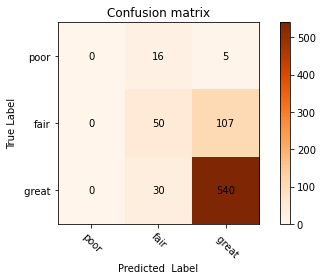

In [6]:
y_true = []
y_pred = []
for i in range(0, 5):
    res_df=pd.read_csv(f'../overall_evaluation/res/coarse_grain_testset_{i}.csv')
    t = res_df["label"].values.tolist()
    p = res_df["#BERT"].values.tolist()
    y_true.extend(t)
    y_pred.extend(p)

print("#BERT")
show_confusion_max(y_true, y_pred)

In [3]:
report_res=[]
for i in range(0,5):
    report_res.append(get_report(i))
print(report_res)

1 428-20191020_fd60180f9d3744cda5c9b9c73b274183
1 430-20190203_2195f16db65c43b5aee65b3ba9859953
2 459-20191028_57213c6d3b934bfda0b2a6d65def71ab
[{'0': {'precision': 0.07407407407407407, 'recall': 0.5, 'f1-score': 0.12903225806451613, 'support': 4}, '1': {'precision': 0.16666666666666666, 'recall': 0.35, 'f1-score': 0.22580645161290322, 'support': 20}, '2': {'precision': 0.8923076923076924, 'recall': 0.5272727272727272, 'f1-score': 0.6628571428571428, 'support': 110}, 'accuracy': 0.5, 'macro avg': {'precision': 0.37768281101614437, 'recall': 0.45909090909090905, 'f1-score': 0.3392319508448541, 'support': 134}, 'weighted avg': {'precision': 0.7595781774886253, 'recall': 0.5, 'f1-score': 0.5816906252149391, 'support': 134}}, {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '1': {'precision': 0.45, 'recall': 0.42857142857142855, 'f1-score': 0.4390243902439024, 'support': 42}, '2': {'precision': 0.8, 'recall': 0.7079646017699115, 'f1-score': 0.7511737089201878, 'suppo

In [4]:
report_res=[]
for i in range(0,5):
    report_res.append(get_report(i))
print(report_res)

1 430-20190203_2195f16db65c43b5aee65b3ba9859953
1 428-20191020_fd60180f9d3744cda5c9b9c73b274183
2 459-20191028_57213c6d3b934bfda0b2a6d65def71ab
[{'0': {'precision': 0.07692307692307693, 'recall': 0.5, 'f1-score': 0.13333333333333336, 'support': 4}, '1': {'precision': 0.16666666666666666, 'recall': 0.35, 'f1-score': 0.22580645161290322, 'support': 20}, '2': {'precision': 0.8970588235294118, 'recall': 0.5446428571428571, 'f1-score': 0.6777777777777778, 'support': 112}, 'accuracy': 0.5147058823529411, 'macro avg': {'precision': 0.38021618903971843, 'recall': 0.46488095238095234, 'f1-score': 0.34563918757467144, 'support': 136}, 'weighted avg': {'precision': 0.7655265726199981, 'recall': 0.5147058823529411, 'f1-score': 0.5952983343875184, 'support': 136}}, {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '1': {'precision': 0.45, 'recall': 0.42857142857142855, 'f1-score': 0.4390243902439024, 'support': 42}, '2': {'precision': 0.8, 'recall': 0.7079646017699115, 'f1-sco

In [5]:
import json
path = './res.json'
with open(path,'w') as f:
    json.dump(report_res, f)

In [9]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report
import pandas as pd

# <1><1><3><3><1><1><3><1><1>

fine_res = pd.read_csv('./results_details_new.csv',
                       sep='\t',
                       names=["wav_path", "score", "rank"])

fine_res

,wav_path,score,rank
0,D:/Xiaoying/paper/icassp2023/wavs/430-20190409...,PLENTY OF COMPLICATED THOUGHTS ABOUT THE RAINB...,<1><1><3><3><1><1><3><1><1>
1,D:/Xiaoying/paper/icassp2023/wavs/430-20190316...,PLENTY OF COMPLICATED THOUGHTS ABOUT THE RAINB...,<3><3><3><3><3><3><1><3><3>
2,D:/Xiaoying/paper/icassp2023/wavs/430-20191219...,PLENTY OF COMPLICATED THOUGHTS ABOUT THE RAINB...,<3><1><1><3><3><3><3><1><1>
3,D:/Xiaoying/paper/icassp2023/wavs/430-20190726...,PLENTY OF COMPLICATED THOUGHTS ABOUT THE RAINB...,<3><3><3><1><1><1><1><3><1>
4,D:/Xiaoying/paper/icassp2023/wavs/430-20190319...,PLENTY OF COMPLICATED THOUGHTS ABOUT THE RAINB...,<3><1><3><1><3><3><1><3><3>
...,...,...,...
1381,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,"NOW, CAN YOU GIVE ME A FEW WORDS TO DESCRIBE T...",<2><3><3><3><1><3><1><1><1><1><3><1><1><1><3>
1382,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,"NOW, CAN YOU GIVE ME A FEW WORDS TO DESCRIBE T...",<3><3><1><3><3><1><3><1><1><3><3><1><3><3><1>
1383,D:/Xiaoying/paper/icassp2023/wavs/459-20180908...,"NOW, CAN YOU GIVE ME A FEW WORDS TO DESCRIBE T...",<2><3><1><3><3><1><3><1><1><1><1><3><1><3><3>
1384,D:/Xiaoying/paper/icassp2023/wavs/459-20191108...,"NOW, CAN YOU GIVE ME A FEW WORDS TO DESCRIBE T...",<1><3><3><3><3><1><3><3><1><3><1><3><3><3><1>


In [23]:
def get_report(i):
    test_df=pd.read_csv(f'../../test/fine_grain_set/fine_grain_testset_{i}.csv')
    labels = []
    preds = []
    for index, row in test_df.iterrows():
        wavid=row['wavid']
        label=eval(row['label'])
        target_df = fine_res[fine_res['wav_path'].str.contains(wavid)]
        pred_val = target_df['rank'].values[0]
        # 只取break位置计算metric
        true_predictions = [int(i)-1 for i in pred_val if i in ['1','2','3']]
        true_labels = [int(i)-1 for i in label[1::2]]

        preds.extend(true_predictions)
        labels.extend(true_labels)
    return [i + 1 for i in labels], [i + 1 for i in preds]
    return classification_report(labels, preds, labels=[0, 1, 2], output_dict=True)

fine-grained: against tts


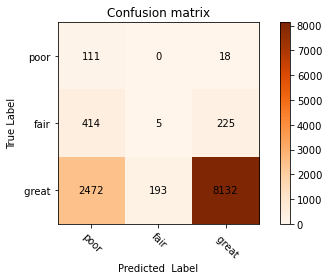

In [26]:
y_true = []
y_pred = []
for i in range(0, 5):
    t, p = get_report(i)
    # print(t, p)
    y_true.extend(t)
    y_pred.extend(p)
print("fine-grained: against tts")
show_confusion_max(y_true, y_pred)

In [2]:
def get_report(i):
    test_df = pd.read_csv(
        f'../../test/fine_grain_set/fine_grain_testset_{i}.csv')
    labels = []
    preds = []
    for index, row in test_df.iterrows():
        wavid = row['wavid']
        label = eval(row['label'])
        target_df = fine_res[fine_res['wav_path'].str.contains(wavid)]
        pred_val = target_df['rank'].values[0]
        true_predictions = [int(i) for i in pred_val if i in ['1','2','3']]
        preds.append(true_predictions)
    return preds


for i in range(0, 5):
    path = f'../../scripts/fine-grained_evaluation/res/fine_grain_testset_{i}.csv'
    res_df = pd.read_csv(path)
    preds = get_report(i)
    res_df["Against-TTS"] = preds
    res_df.to_csv(path, index=False)

In [12]:
label='[0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0]'
label=eval(label)
true_labels = label[1::2]
true_labels

[3, 3, 2, 3, 3, 3, 3]

In [11]:
report_res = []
for i in range(0, 5):
    report_res.append(get_report(i))
print(report_res)

import json
path = './fine_res.json'
with open(path,'w') as f:
    json.dump(report_res, f)

[{'0': {'precision': 0.04854368932038835, 'recall': 0.9090909090909091, 'f1-score': 0.09216589861751152, 'support': 22}, '1': {'precision': 0.023809523809523808, 'recall': 0.015873015873015872, 'f1-score': 0.019047619047619046, 'support': 63}, '2': {'precision': 0.9791827293754819, 'recall': 0.7623049219687875, 'f1-score': 0.8572392845089436, 'support': 1666}, 'accuracy': 0.7372929754426042, 'macro avg': {'precision': 0.35051198083513135, 'recall': 0.5624229489775708, 'f1-score': 0.3228176007246914, 'support': 1751}, 'weighted avg': {'precision': 0.9331161555137643, 'recall': 0.7372929754426042, 'f1-score': 0.8174690449808597, 'support': 1751}}, {'0': {'precision': 0.028761061946902654, 'recall': 0.8125, 'f1-score': 0.05555555555555555, 'support': 16}, '1': {'precision': 0.029411764705882353, 'recall': 0.0064516129032258064, 'f1-score': 0.010582010582010581, 'support': 155}, '2': {'precision': 0.9585849870578085, 'recall': 0.753731343283582, 'f1-score': 0.8439042916824914, 'support': 1